## __MODELING__

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve
import sklearn
sklearn.metrics.SCORERS.keys()
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE

In [2]:
building = pd.read_csv("D:\Project\Project\earthquake\earthquake_sample.csv")

In [3]:
building.head()

,damage,Unnamed: 1,Unnamed: 0,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage.1
0,High Damage,113575,113575,210505001611,21,2105,210507,2,0,20,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
1,High Damage,369157,369157,245202000561,24,2408,240808,2,2,13,...,0,0,0,0,0,0,0,Damaged-Not used,Major repair,High Damage
2,High Damage,294822,294822,235902000761,23,2304,230407,2,0,14,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
3,High Damage,255034,255034,232209000451,23,2313,231301,1,0,15,...,0,0,1,0,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage
4,High Damage,527276,527276,301309000401,30,3003,300303,2,0,12,...,0,0,1,1,0,0,0,Damaged-Rubble unclear,Reconstruction,High Damage


In [4]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37930 entries, 0 to 37929
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   damage                                  37930 non-null  object 
 1   Unnamed: 1                              37930 non-null  int64  
 2   Unnamed: 0                              37930 non-null  int64  
 3   building_id                             37930 non-null  int64  
 4   district_id                             37930 non-null  int64  
 5   vdcmun_id                               37930 non-null  int64  
 6   ward_id                                 37930 non-null  int64  
 7   count_floors_pre_eq                     37930 non-null  int64  
 8   count_floors_post_eq                    37930 non-null  int64  
 9   age_building                            37930 non-null  int64  
 10  plinth_area_sq_ft                       37930 non-null  fl

In [5]:
building.shape

(37930, 34)

In [6]:
building.drop(["Unnamed: 0","Unnamed: 1", "building_id", "district_id", "vdcmun_id", "ward_id", "has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag", "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo", "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other" ], axis=1, inplace=True)

In [7]:
building.head()

,damage,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed,damage.1
0,High Damage,2,0,20,18.58,3.05,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage
1,High Damage,2,2,13,38.65,4.27,4.27,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Major repair,High Damage
2,High Damage,2,0,14,51.10,4.27,0.00,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage
3,High Damage,1,0,15,13.01,2.13,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage
4,High Damage,2,0,12,27.68,3.66,0.00,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble unclear,Reconstruction,High Damage


In [8]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37930 entries, 0 to 37929
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   damage                       37930 non-null  object 
 1   count_floors_pre_eq          37930 non-null  int64  
 2   count_floors_post_eq         37930 non-null  int64  
 3   age_building                 37930 non-null  int64  
 4   plinth_area_sq_ft            37930 non-null  float64
 5   height_ft_pre_eq             37930 non-null  float64
 6   height_ft_post_eq            37930 non-null  float64
 7   land_surface_condition       37930 non-null  object 
 8   foundation_type              37930 non-null  object 
 9   roof_type                    37930 non-null  object 
 10  ground_floor_type            37930 non-null  object 
 11  other_floor_type             37930 non-null  object 
 12  position                     37930 non-null  object 
 13  plan_configurati

In [9]:
bu = building[["age_building", "count_floors_pre_eq", "plinth_area_sq_ft","height_ft_pre_eq", "foundation_type", "roof_type", "ground_floor_type",'other_floor_type', "damage"]]

In [10]:
bu

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type,damage
0,20,2,18.58,3.05,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
1,13,2,38.65,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
2,14,2,51.10,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
3,15,1,13.01,2.13,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,High Damage
4,12,2,27.68,3.66,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,High Damage
...,...,...,...,...,...,...,...,...,...
37925,20,2,37.16,3.96,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Low Damage
37926,32,1,39.02,3.05,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Low Damage
37927,8,4,52.03,9.14,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Low Damage
37928,18,2,27.87,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Low Damage


In [11]:
cat_building = ["foundation_type", "roof_type", "ground_floor_type", 'other_floor_type']
num_building = ["age_building", "count_floors_pre_eq", "plinth_area_sq_ft","height_ft_pre_eq"]

In [12]:
bu['damage'] = bu['damage'].map({'Low Damage' : 0, 'High Damage' : 1})

<ipython-input-12-5c422f57ed58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bu['damage'] = bu['damage'].map({'Low Damage' : 0, 'High Damage' : 1})


In [13]:
bu['damage'].value_counts()

1    22877
0    15053
Name: damage, dtype: int64

In [14]:
bu['damage'].value_counts(normalize=True)*100

1    60.313736
0    39.686264
Name: damage, dtype: float64

Dari presentase data High damage dan Low damage, data tersebut sudah cukup balance, sehingga saya tidak akan melakukan resampling

## __TRAIN TEST SPLIT__

In [15]:
X = bu.drop('damage', axis=1)
y = bu['damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size =0.2, random_state=1510)

In [16]:
X_train.head()

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type
14415,70,2,18.39,4.88,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud
11761,25,2,39.95,5.18,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud
19761,15,3,32.70,6.71,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud
6003,32,2,59.46,3.66,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud
7903,10,2,46.82,5.49,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud


In [17]:
X_test.head()

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type
12974,20,1,32.52,4.57,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,Not applicable
16644,25,1,63.64,3.05,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable
12651,32,3,86.96,10.97,Cement-Stone/Brick,RCC/RB/RBC,Brick/Stone,Timber-Planck
8368,3,2,42.92,6.40,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck
36684,8,1,27.87,2.74,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,RC,Not applicable


In [18]:
y_test.head()

12974    1
16644    1
12651    1
8368     1
36684    0
Name: damage, dtype: int64

In [19]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

Untuk pemilihan modeling, saya memilih 3 yaitu KNN, Decision Tree dan Random forest

## __K NEAREST NEIGHBORS__

In [20]:
knn_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_numeric', knn_pipe_num, num_building),
    ('pipe_cat', knn_pipe_cat, cat_building)
])

# combine all pipeline
knn_pipe = Pipeline([
    ('transformer', knn_transformer),
    ('knn', knn)
])

In [21]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __DECISION TREE CLASSIFICATION__

In [22]:
dtc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])

# for all object columns
dtc_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
dtc_transformer = ColumnTransformer([
    ('pipe_numeric', dtc_pipe_num, num_building),
    ('pipe_cat', dtc_pipe_cat, cat_building)
])

# combine all pipeline
dtc_pipe = Pipeline([
    ('transformer', dtc_transformer),
    ('dtc', dtc)
])

In [23]:
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __RANDOM FOREST CLASSIFICATION__

In [24]:
rfc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_numeric', rfc_pipe_num, num_building),
    ('pipe_cat', rfc_pipe_cat, cat_building)
])

# combine all pipeline
rfc_pipe = Pipeline([
    ('transformer', rfc_transformer),
    ('rfc', rfc)
])

In [25]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

## __CROSS VALIDATION SCORE__

In [26]:
skfold = StratifiedKFold(n_splits=5, random_state=1510, shuffle=True)

knn_score = cross_val_score(knn_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(dtc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished


Pada kasus ini saya fokus untuk menekan hasil predik low damage tetapi actualnya adalah high damage, sehingga saya menekan FN, oleh karena itu saya fokus di score recall

In [27]:
print('KNN Val Score:', knn_score)
print('DTC Val Score:', dtc_score)
print('RFC Val Score:', rfc_score)

KNN Val Score: [0.80469817 0.80469817 0.8        0.79644809 0.80546448]
DTC Val Score: [0.67822999 0.67304015 0.69071038 0.66202186 0.66748634]
RFC Val Score: [0.77984157 0.78530456 0.78961749 0.78934426 0.78442623]


In [28]:
print('KNN Val Score:', knn_score.mean())
print('DTC Val Score:', dtc_score.mean())
print('RFC Val Score:', rfc_score.mean())

KNN Val Score: 0.8022617816207761
DTC Val Score: 0.6742977448008323
RFC Val Score: 0.7857068226155773


In [29]:
dtcs = dtc_score.mean()
rfcs = rfc_score.mean()
kncs = knn_score.mean()
df = pd.DataFrame({'KNearest Neighbors': [kncs], 'Decision Tree CV Score': [dtcs], 'Random Forest CV Score': [rfcs]})
df

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.802262,0.674298,0.785707


Perbandingan nilai CV score sebelum dilakukan hyperparameter tunning antara 3 model ini terlihat KNN bernilai paling besar, yakni 0.802

## __HYPERPARAMETER TUNNING__

> ## KNN HYPERPARAM

In [30]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_numeric',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['age_building', 'count_floors_pre_eq',
                                     'plinth_area_sq_ft', 'height_ft_pre_eq']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first'))]),
                                    ['foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type'])])),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('pipe_numeric',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['age_building', 'count_floors_pre_eq',
                                   'plinth_

In [31]:
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'knn', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'knn__algori

In [32]:
knn_param = {'knn__n_neighbors': [5, 10, 20, 30, 40 ,50, 60 ,70, 80, 90, 100, 110, 120, 130], 
             'knn__p': [1,2], 
             'knn__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

knn_tuned = GridSearchCV(estimator=knn_pipe,
                          param_grid=knn_param, 
                          cv=skfold,
                          n_jobs=-1,
                          scoring='recall',
                          verbose=1
                          )

In [33]:
knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 13.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age_building',
                                                                          'count_floors_pre_eq',
                                                                          'plinth_area_sq_ft',
                                                                          'height_ft_pre_eq']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('encoder',
     

In [34]:
knn_tuned.best_params_

{'knn__leaf_size': 20, 'knn__n_neighbors': 130, 'knn__p': 1}

In [35]:
knn_tun = knn_tuned.best_estimator_

In [36]:
knn_tun

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [37]:
knn_tuned_score = cross_val_score(knn_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
knn_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished


array([0.93963398, 0.93280524, 0.9363388 , 0.93442623, 0.93825137])

In [38]:
print(knn_tuned_score.mean())

0.936291123539658


> ## DTC HYPERPARAM

In [39]:
dtc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'dtc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'dtc__ccp_al

In [40]:
dtc_param = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth':[5,10,15,20,25,30],
    'dtc__min_samples_split':[2,5,10],
    'dtc__min_samples_leaf':[1,2,5,7],
}

dtc_tuned = GridSearchCV(estimator=dtc_pipe, 
                            param_grid=dtc_param, 
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [41]:
dtc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   29.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age_building',
                                                                          'count_floors_pre_eq',
                                                                          'plinth_area_sq_ft',
                                                                          'height_ft_pre_eq']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('encoder',
     

In [42]:
dtc_tuned.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 5,
 'dtc__min_samples_leaf': 7,
 'dtc__min_samples_split': 2}

In [43]:
dtc_tuned.best_score_

0.9476567213413277

In [44]:
dtc_tuned.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [45]:
dtc_tun = dtc_tuned.best_estimator_

In [46]:
dtc_tuned_score = cross_val_score(dtc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.95110626, 0.9308932 , 0.95519126, 0.95054645, 0.95054645])

In [47]:
dtc_tuned_score.mean()

0.9476567213413277

> ## RFC HYPERPARAM

In [48]:
rfc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'rfc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_cat', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'transformer__pipe_cat__memory', 'transformer__pipe_cat__steps', 'transformer__pipe_cat__verbose', 'transformer__pipe_cat__encoder', 'transformer__pipe_cat__encoder__categories', 'transformer__pipe_cat__encoder__drop', 'transformer__pipe_cat__encoder__dtype', 'transformer__pipe_cat__encoder__handle_unknown', 'transformer__pipe_cat__encoder__sparse', 'rfc__bootst

In [49]:
rfc_param = {'rfc__n_estimators': [400, 800, 1100, 1500, 2000],
            'rfc__max_depth': [None,5, 10, 20, 30, 50, 70, 90],
            'rfc__min_samples_split': [2, 5, 10],
            'rfc__max_features': ['auto', 'sqrt'],
            'rfc__min_samples_leaf' : [2, 4, 6]
           }


rfc_tuned = RandomizedSearchCV(estimator=rfc_pipe, 
                            param_distributions=rfc_param,
                            n_iter=100,
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [50]:
rfc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 47.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('pipe_numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                RobustScaler())]),
                                                                               ['age_building',
                                                                                'count_floors_pre_eq',
                                                                                'plinth_area_sq_ft',
                                                                                'height_ft_pre_eq']),
                                                                              ('pipe_cat',
                                              

In [51]:
rfc_tuned.best_params_

{'rfc__n_estimators': 1500,
 'rfc__min_samples_split': 5,
 'rfc__min_samples_leaf': 6,
 'rfc__max_features': 'sqrt',
 'rfc__max_depth': 5}

In [52]:
rfc_tuned.best_score_

0.943885722047337

In [53]:
rfc_tuned.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age_building',
                                                   'count_floors_pre_eq',
                                                   'plinth_area_sq_ft',
                                                   'height_ft_pre_eq']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type',
        

In [54]:
rfc_tun = rfc_tuned.best_estimator_

In [55]:
rfc_tuned_score = cross_val_score(rfc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.8s remaining:   35.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.1s finished


array([0.94646272, 0.94209232, 0.94726776, 0.94016393, 0.93934426])

In [56]:
rfc_tuned_score.mean()

0.9430661991781635

In [57]:
knncst = knn_tuned_score.mean()
dtcst = dtc_tuned_score.mean()
rfcst = rfc_tuned_score.mean()

dft = pd.DataFrame({'KNearest Neighbors':[knncst], 'Decision Tree CV Score': [dtcst], 'Random Forest CV Score': [rfcst]})
dft

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.936291,0.947657,0.943066


In [58]:
knncv = knn_score.mean()
knncv2 = knn_tuned_score.mean()
sdtcv = dtc_score.mean()
sdtcv2 = dtc_tuned_score.mean()
srfcv = rfc_score.mean()
srfcv2 = rfc_tuned_score.mean()


cc = {
    'Before Tuned' : [knncv, sdtcv, srfcv],
    'After Tuned': [knncv2, sdtcv2, srfcv2]
}

_score = pd.DataFrame(data=cc, index=["KNearest Neighbors", 'Decision Tree', 'Random Forest'])
_score


,Before Tuned,After Tuned
KNearest Neighbors,0.802262,0.936291
Decision Tree,0.674298,0.947657
Random Forest,0.785707,0.943066


Untuk hasil perbandingan antara 3 model ini, KNN sebelum dilakukan tunning mendapat nilai 0.8, lebih besar dibandingkan DTC dan RFC, namun setelah dilakukan Hyper parameter tuning, model DTC lebih besar yaitu diangka 0.947 sehingga model yang saya pilih adalah DTC

> ## Best Model DECISION TREE

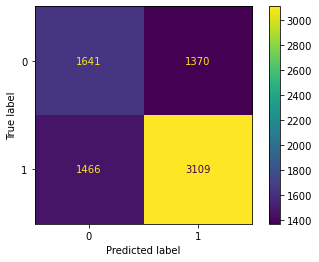

In [59]:
dtc_pipe.fit(X_train, y_train)
plot_confusion_matrix(dtc_pipe, X_test, y_test)

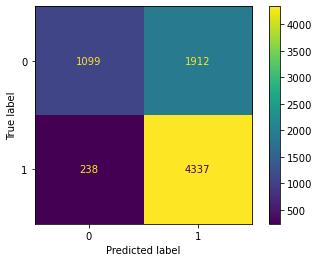

In [60]:
dtc_tun.fit(X_train, y_train)
plot_confusion_matrix(dtc_tun, X_test, y_test)

In [76]:
precision_score(y_test, dtc_tun.predict(X_test))

0.6946222791293214

In [77]:
recall_score(y_test, dtc_tun.predict(X_test))

0.9486338797814208

## __IMPORT MODEL__

In [63]:
import joblib

In [64]:
dtc_tun.fit(X, y)
filename = 'Model.sav'
joblib.dump(dtc_tun, filename)

['Model.sav']

In [65]:
# build1 = pd.DataFrame([{
#     'age_building': 55,
#     'count_floors_pre_eq': 2,
#     'plinth_area_sq_ft': 100,
#     'height_ft_pre_eq': 15,
#     'foundation_type' : 'Mud mortar-Stone/Brick',
#     'roof_type': 'Bamboo/Timber-Light roof',
#     'ground_floor_type': 'Mud',
#     'other_floor_type': 'Not applicable'
# }], index=[0])

In [66]:
# build1

In [67]:
# dtc_tun.predict(build1)[0]

In [68]:
dtc_tun.predict(pd.DataFrame(bu.iloc[37925,:-1]).T)

array([0], dtype=int64)

In [69]:
# dtc_tun.predict(build1) # threshold default (0.5)

In [70]:
# bu.head()

,age_building,count_floors_pre_eq,plinth_area_sq_ft,height_ft_pre_eq,foundation_type,roof_type,ground_floor_type,other_floor_type,damage
0,20,2,18.58,3.05,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,1
1,13,2,38.65,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,1
2,14,2,51.10,4.27,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,1
3,15,1,13.01,2.13,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,1
4,12,2,27.68,3.66,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,1
